# Plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import torchvision
# import torchvision.transforms as transforms
# import torch
# from torch.utils.data import DataLoader
# # from torchsummary import summary
# # import sklearn
# import wandb

desktop_path = '/Users/jornelasmunoz/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
if desktop_path in sys.path[0]: sys.path.insert(0, desktop_path + 'lib/'); path = desktop_path
elif laptop_path in sys.path[0]: sys.path.insert(0, laptop_path + 'lib/'); path = laptop_path
print('Using path = ', path)

# from dataset import MNIST_MURA


# # Change plotting parameters
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Times", #"Computer Modern Serif"
#     "figure.figsize" : [15,10],
# })

# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using {device} device")

# Log into WandB
# wandb.login()

Using path =  /Users/jornelasmunoz/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/


In [6]:
df = pd.read_csv('/Users/jornelasmunoz/Downloads/CodedAperture_CIFAR10_classification.csv')
df.head()
direct_model = df[df['Model']== 'Direct']
recon_model = df[df['Model']== 'Reconstructed']

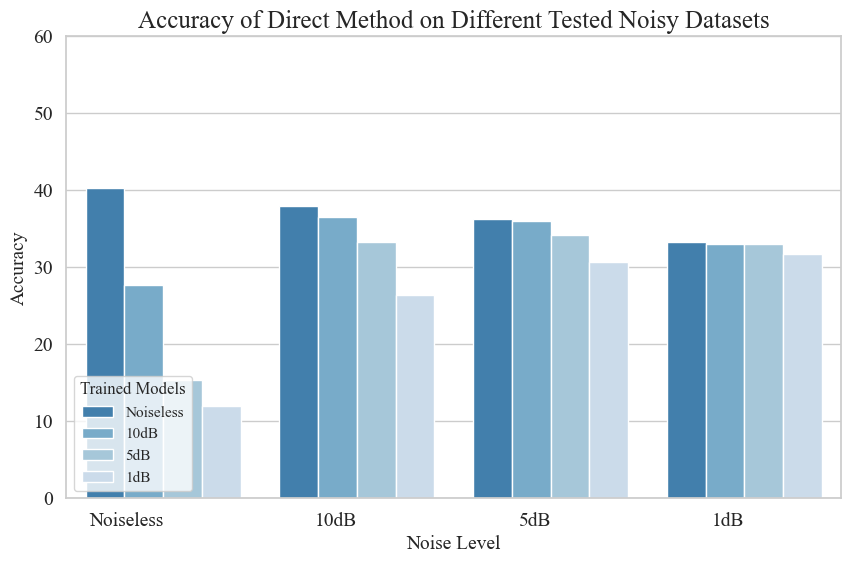

In [10]:
# Set up the Seaborn style
sns.set(style="whitegrid", font="Times New Roman" )

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=direct_model['Trained Model'],y=direct_model['Accuracy'], data=direct_model, hue=direct_model['Tested Model'], palette='tab20c')

# Customize the chart
plt.title('Accuracy of Direct Method on Different Tested Noisy Datasets', fontsize=18)
plt.xlabel('Noise Level', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=14)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)
plt.legend(title='Trained Models', loc='lower left')
plt.ylim([0,60])

# plt.savefig('../figs/CIFAR_accuracy_direct_all_noise.png')
plt.show()

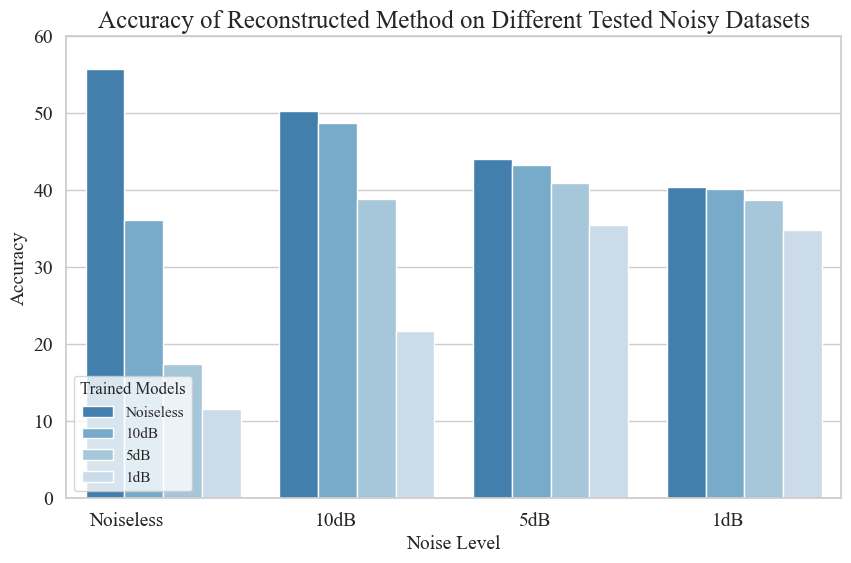

In [11]:
# Set up the Seaborn style
sns.set(style="whitegrid", font="Times New Roman" )

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=recon_model['Trained Model'],y=recon_model['Accuracy'], data=recon_model, hue=df['Tested Model'], palette='tab20c')

# Customize the chart
plt.title('Accuracy of Reconstructed Method on Different Tested Noisy Datasets', fontsize=18)
plt.xlabel('Noise Level', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=14)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)
plt.legend(title='Trained Models', loc='lower left')
plt.ylim([0,60])

# plt.savefig('../figs/CIFAR_accuracy_recon_all_noise.png')

# Show the plot
plt.show()

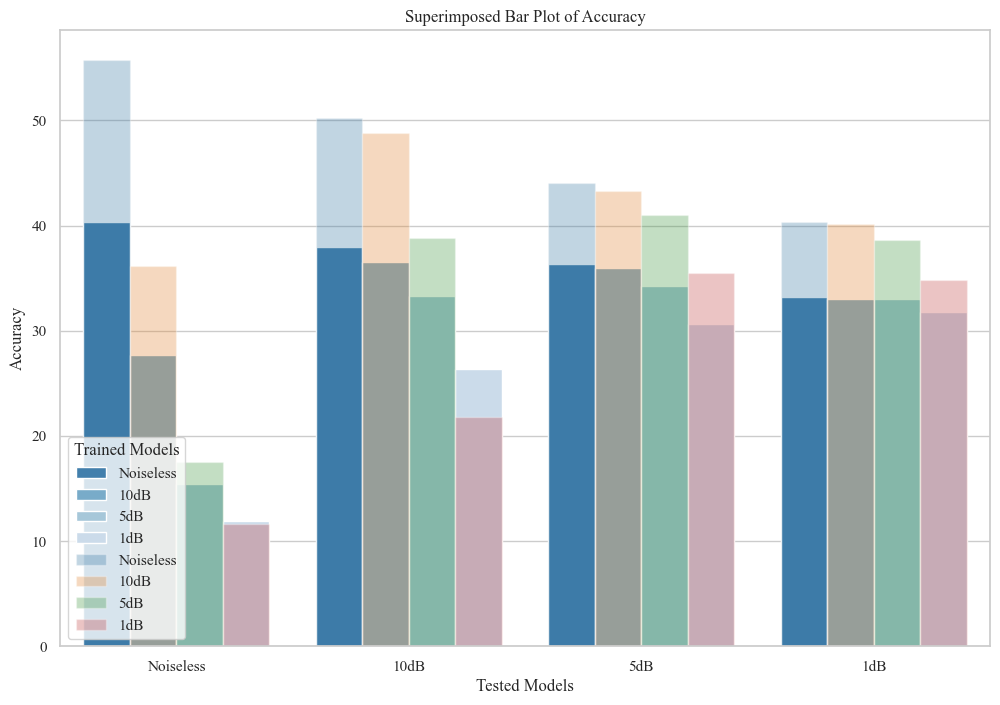

In [14]:
# Set up the Matplotlib figure
plt.figure(figsize=(12, 8))

# Iterate over unique trained models and superimpose bar plots
for model in df['Model'].unique():
    subset_df = df[df['Model'] == model]
    sns.barplot(x=subset_df['Trained Model'],y=subset_df['Accuracy'], data=subset_df, hue=df['Tested Model'], palette='tab20c' if model == 'Direct' else 'tab10', alpha = 1 if model == 'Direct' else .3)
    # plt.bar(subset_df['Tested Model'], subset_df['Accuracy'], label= model)

# Customize the chart
plt.title('Superimposed Bar Plot of Accuracy')
plt.xlabel('Tested Models')
plt.ylabel('Accuracy')
plt.legend(title='Trained Models', loc='lower left')
# plt.ylim([50,100])
# Show the plot
plt.show()

In [27]:
import scipy.stats as stats

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(list(direct_model.Accuracy), list(recon_model.Accuracy))

# Check if the p-value is less than your chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

The difference is statistically significant.


In [29]:
p_value

0.019009115740165467